## Learning from Imbalanced Datasets (Supervised and Unsupervised Learning)

### Registration Number : 2100346

## Mobile Price Classification 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.datasets import make_imbalance

C:\Users\mindr\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# loading dataset from github

data = pd.read_csv('https://raw.githubusercontent.com/winsid07/CE888-/main/Data/Mobile_Price_Classification.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Data exploration

In [3]:
df = data.copy()
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape 

(2000, 21)

In [5]:
# dataset detailed info

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# Missing values

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
# Data Summary

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
#There is one duplicate row
df.duplicated().sum()  

0

In [9]:
# checking output values
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [10]:
# To make it a binary classification problem we will make some changes in target variable
# Replace 0 and 1 to 0, 2 and 3 to 1

new_range = {'price_range': {1:0, 2:1, 3:1}}

df.replace(new_range, inplace=True)
df['price_range'].value_counts()

0    1000
1    1000
Name: price_range, dtype: int64

### Data visualization

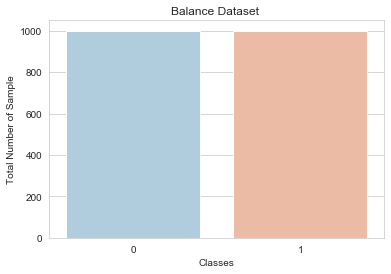

In [11]:
# Target outout class

sns.set_style('whitegrid')
fig= sns.countplot(x= df['price_range'],data=df,palette='RdBu_r').get_figure()
plt.title('Balance Dataset ')
plt.xlabel('Classes')
plt.ylabel('Total Number of Sample')
plt.show()
fig.savefig('histogram_org_mobile.pdf')

In [12]:
# Distribution of target class
target_count = df['price_range'].value_counts()
target_count

0    1000
1    1000
Name: price_range, dtype: int64

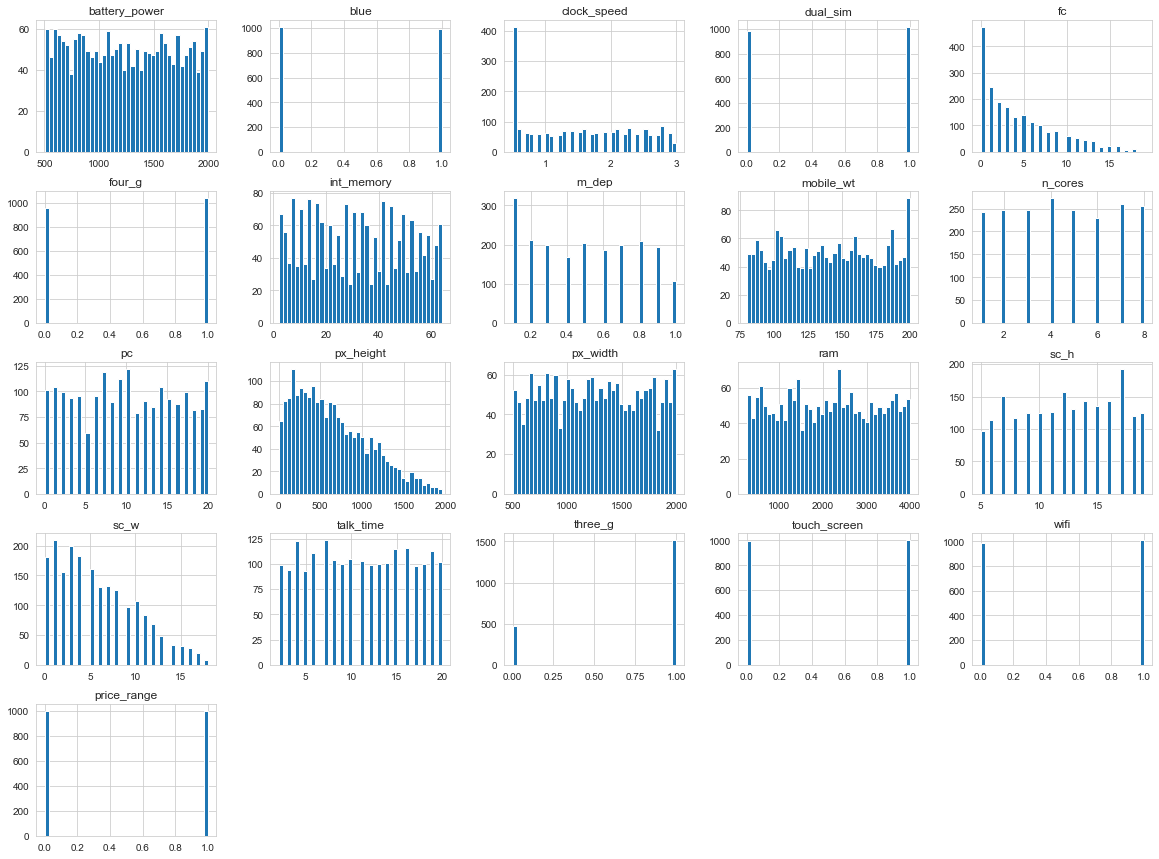

In [13]:
# Histogram Plots
pl = df.hist(bins=40, figsize=(20,15))

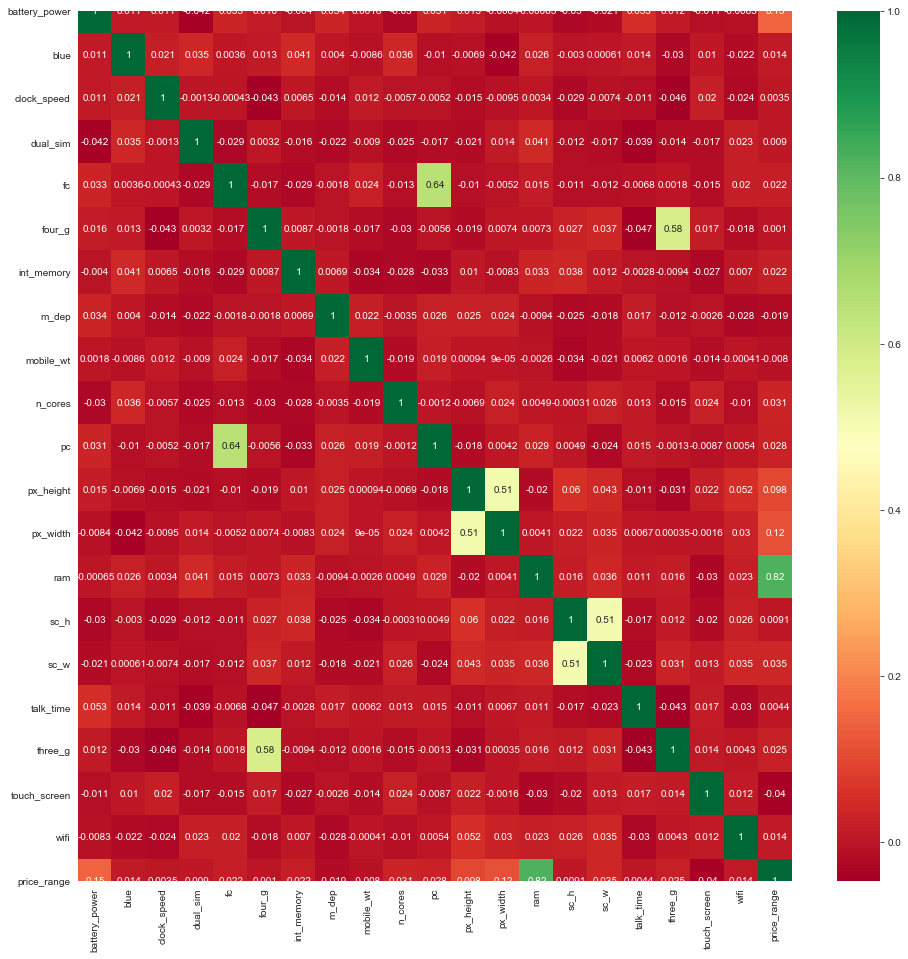

In [14]:
#correlations and ploting a heatmap

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

### Balanced dataset

In [15]:
#Checking the distributation

print(f'Distribution before imbalancing') 

target_count=df['price_range'].value_counts()
print(target_count)

imbalance_target=(target_count[1] /(target_count[0] + target_count[1])) * 100
print(f'Balanced Percentage : {imbalance_target} %')

imbalance_target=(target_count[0] / (target_count[0] + target_count[1])) * 100
print(f'Balanced Percentage : {imbalance_target} %')

Distribution before imbalancing
0    1000
1    1000
Name: price_range, dtype: int64
Balanced Percentage : 50.0 %
Balanced Percentage : 50.0 %


In [16]:
y_org = df['price_range']
x_org = df.drop(['price_range'],axis=1)

### New Imbalance

In [17]:
# Low Imbalance (65%)

x_low, y_low = make_imbalance(x_org, y_org, sampling_strategy = {0: 1000 , 1: 538}, random_state = 42)


print(f'Distribution after low imbalancing') 

low_target_count= y_low.value_counts()
print(low_target_count)

low_imbalance_target=(low_target_count[1] /(low_target_count[0] + low_target_count[1])) * 100
print(f'Imbalance Percentage : {low_imbalance_target} %')

low_imbalance_target=(low_target_count[0] / (low_target_count[0] + low_target_count[1])) * 100
print(f'Imbalance Percentage : {low_imbalance_target} %')

Distribution after low imbalancing
0    1000
1     538
Name: price_range, dtype: int64
Imbalance Percentage : 34.980494148244475 %
Imbalance Percentage : 65.01950585175553 %


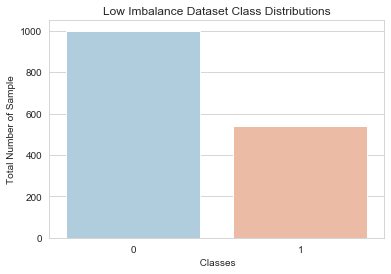

In [18]:
# Saving the fig

sns.set_style('whitegrid')
fig = sns.countplot(x = y_low,data=df,palette='RdBu_r').get_figure()
plt.title('Low Imbalance Dataset Class Distributions')
plt.xlabel(' Classes')
plt.ylabel('Total Number of Sample')
plt.show()
fig.savefig('histogram_low_mobile.pdf')

In [19]:
# Medium Imbalance (75%)

x_medium, y_medium = make_imbalance(x_org, y_org, sampling_strategy = {0: 1000 , 1: 333}, random_state = 42)


print(f'Distribution after medium imbalancing') 

medium_target_count= y_medium.value_counts()
print(medium_target_count)

medium_imbalance_target=(medium_target_count[1] /(medium_target_count[0] + medium_target_count[1])) * 100
print(f'Medium Imbalance Percentage : {medium_imbalance_target} %')


medium_imbalance_target=(medium_target_count[0] /(medium_target_count[0] + medium_target_count[1])) * 100
print(f'Medium Imbalance Percentage : {medium_imbalance_target} %')

Distribution after medium imbalancing
0    1000
1     333
Name: price_range, dtype: int64
Medium Imbalance Percentage : 24.981245311327832 %
Medium Imbalance Percentage : 75.01875468867217 %


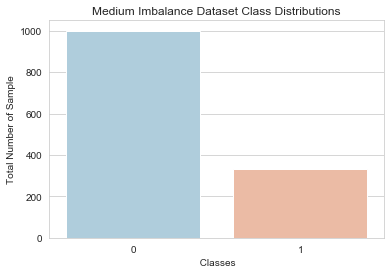

In [20]:
#Saving figure

sns.set_style('whitegrid')
fig = sns.countplot(x = y_medium,data=df,palette='RdBu_r').get_figure()
plt.title('Medium Imbalance Dataset Class Distributions')
plt.xlabel(' Classes')
plt.ylabel('Total Number of Sample')
plt.show()

fig.savefig('histogram_medium_mobile.pdf')

In [21]:
# High Imbalance (90%)

x_high, y_high = make_imbalance(x_org, y_org, sampling_strategy = {0: 1000 , 1: 111}, random_state = 42)


print(f'Distribution after high imbalancing') 

high_target_count= y_high.value_counts()
print(high_target_count)

high_imbalance_target=(high_target_count[1] /(high_target_count[0] + high_target_count[1])) * 100
print(f'High Imbalance Percentage : {high_imbalance_target} %')

high_imbalance_target=(high_target_count[0] /(high_target_count[0] + high_target_count[1])) * 100
print(f'High Imbalance Percentage : {high_imbalance_target} %')

Distribution after high imbalancing
0    1000
1     111
Name: price_range, dtype: int64
High Imbalance Percentage : 9.99099909990999 %
High Imbalance Percentage : 90.00900090009 %


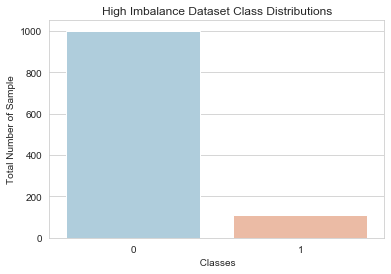

In [22]:
#Saving figure

sns.set_style('whitegrid')
fig = sns.countplot(x = y_high,data=df,palette='RdBu_r').get_figure()
plt.title('High Imbalance Dataset Class Distributions')
plt.xlabel(' Classes')
plt.ylabel('Total Number of Sample')
plt.show()

fig.savefig('histogram_high_mobile.pdf')

In [23]:
## Low imabalance

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import make_scorer

## Load Data

In [25]:
df=pd.read_csv('mobile_Low.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,output
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [26]:
columns=df.columns
columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'output'],
      dtype='object')

In [27]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

## Baseline 1: Random Forest

C:\Users\mindr\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       199
           1       0.96      0.91      0.93       109

    accuracy                           0.95       308
   macro avg       0.96      0.94      0.95       308
weighted avg       0.95      0.95      0.95       308



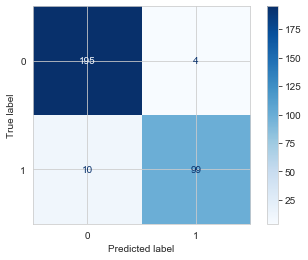

In [28]:
clf_rf=RandomForestClassifier(n_jobs=2,random_state=0)
clf_rf.fit(X_train,y_train)
y_predict=clf_rf.predict(X_test)
plot_confusion_matrix(clf_rf,X_test,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict))

In [29]:
score1_rf=accuracy_score(y_test,y_predict)
print("Accuracy (without cross-validation) : {}".format(score1_rf))

score2_rf = cross_val_score(clf_rf, X_train, y_train, cv=10)
print(score2_rf)
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))

score3_rf = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring=make_scorer(cohen_kappa_score))
print(score3_rf)
print("Cohen Kappa Score (after cross-validation): {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))

Accuracy (without cross-validation) : 0.9545454545454546
[0.94308943 0.97560976 0.95934959 0.95934959 0.95121951 0.92682927
 0.97560976 0.94308943 0.96747967 0.95934959]
Accuracy (after cross-validation): 0.9560975609756097 (+/- 0.014634146341463402)
[0.87417799 0.94607628 0.90914463 0.9081404  0.89156627 0.83646033
 0.94607628 0.86995922 0.92848837 0.90803051]
Cohen Kappa Score (after cross-validation): 0.9018120288633551 (+/- 0.033040613615513914)


## Partitioning the dataset into 10 bins, keeping the imbalance ratio from the original dataset

In [30]:

target_count=df.output.value_counts()
print(target_count)

imbalance_target=(target_count[1]/(target_count[0]+target_count[1]))*100
print(imbalance_target)

0    1000
1     538
Name: output, dtype: int64
34.980494148244475


In [31]:
def create_bins (df,no_of_bins,orig_imbalance):
    df_class0=df[df['output']==0]
    df_class1=df[df['output']==1]

    len0=int(len(df_class0)/no_of_bins)
    len1=int(len(df_class1)/no_of_bins)

    ind0=0
    ind1=0
    start0=0
    start1=0

    bins=[]

    print("Original Imbalance in the dataset: {} %".format(orig_imbalance))
    for i in range(no_of_bins):
        ind0+=len0
        ind1+=len1
        bin_=pd.concat([df_class1.iloc[start1:ind1,:],df_class0.iloc[start0:ind0,:]])
        target_cnt=bin_.output.value_counts()
        imbalance=(target_cnt[1]/(target_cnt[0]+target_cnt[1]))*100
        print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
        bins.append(bin_.values)
        start0+=len0
        start1+=len1

    return bins

In [32]:
bins= create_bins(df,10, imbalance_target)

Original Imbalance in the dataset: 34.980494148244475 %
Class imbalance ratio in bin 0 : 34.64052287581699 %
Class imbalance ratio in bin 1 : 34.64052287581699 %
Class imbalance ratio in bin 2 : 34.64052287581699 %
Class imbalance ratio in bin 3 : 34.64052287581699 %
Class imbalance ratio in bin 4 : 34.64052287581699 %
Class imbalance ratio in bin 5 : 34.64052287581699 %
Class imbalance ratio in bin 6 : 34.64052287581699 %
Class imbalance ratio in bin 7 : 34.64052287581699 %
Class imbalance ratio in bin 8 : 34.64052287581699 %
Class imbalance ratio in bin 9 : 34.64052287581699 %


In [33]:
model_accuracies={} 
model_kappa_scores={}

# Analyzing the number of clusters using Elbow method and Silhouette method

C:\Users\mindr\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


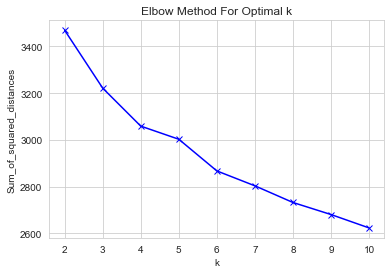

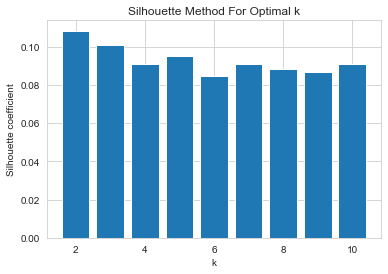

In [34]:
#***** CHANGE MANUALLY DURING EACH ITERATION *****#

i=9 # The bin index to be left-out while training, and used only for testing 

#************************************************#

#CREATE TESTING DATA

leave_out=i #for indexing while saving the model accuracies to a dictionary
test_data=bins[i] 

#CREATE TRAINING DATA

compile9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining data from all other bins except the left-out one
data=pd.DataFrame(compile9)
data.columns=columns
mms=MinMaxScaler() #normalizing the data
mms.fit(data)
data_transformed=mms.transform(data)

#ELBOW METHOD TO IDENTIFY THE NUMBER OF CLUSTERS

Sum_of_squared_distances = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k,random_state=1)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#SILHOUETTE METHOD TO IDENTIFY THE NUMBER OF CLUSTERS
K = range(2,11)
no_of_clusters=[]
silhouette_scores=[]

for k in K:
    km = KMeans(n_clusters=k,random_state=1)
    preds=km.fit_predict(data_transformed)
    centers=km.cluster_centers_

    score=silhouette_score(data_transformed,preds)

    no_of_clusters.append(k)
    silhouette_scores.append(score)

plt.ylabel("Silhouette coefficient")
plt.xlabel("k")
plt.title('Silhouette Method For Optimal k')
plt.bar(no_of_clusters,silhouette_scores)
plt.show()

In [35]:
#*****CHANGE MANUALLY DURING EACH ITERATION*****#

num_of_clusters=3 #Decided after looking at the plots from the previous cell 

#***********************************************#

min_class=0 # The minority class label
max_class=1 # The majority class label

#***********************************************#

#FITTING A K-MEANS CLUSTERING MODEL

kmeans = KMeans(n_clusters=num_of_clusters, random_state=1)
kmeans.fit_predict(data_transformed)

cluster_df=data
cluster_df["Cluster label"]=kmeans.labels_
cols=list(cluster_df.columns)
cols= cols[:-2] + [cols[-1]] + [cols[-2]]
cluster_df=cluster_df[cols]
  
g=globals() #To facilitate naming dynamically

#Filtering out the data belonging to each cluster

for i in range(0,num_of_clusters):
    g['cluster_{}'.format(i)] = cluster_df[cluster_df['Cluster label']==i]

#Checking for number of entries from minority class in each cluster

for i in range(0,num_of_clusters):
    g['clus_{}_class_{}'.format(i,min_class)] = g['cluster_{}'.format(i)][g['cluster_{}'.format(i)]['output']==min_class]
    if (len(g['clus_{}_class_{}'.format(i,min_class)])!=0):
        g['X{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,:-1]
        g['y{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,-1]
        g['clf_{}'.format(i)]=RandomForestClassifier(n_jobs=2,random_state=0)
        g['clf_{}'.format(i)].fit(g['X{}'.format(i)],g['y{}'.format(i)])
        g['Class_val_{}{}'.format(i,min_class)]=min_class
    else:
        g['Class_val_{}{}'.format(i,min_class)]=max_class
  


test_cluster =pd.DataFrame(test_data)
test_cluster.columns=df.columns
test_cluster["Cluster label"]=kmeans.predict(test_data)
cols=list(test_cluster.columns)
cols= cols[:-2] + [cols[-1]] + [cols[-2]]
test_cluster=test_cluster[cols]

#Dividing the results based on cluster label, to predict the class labels of the corresponding entries

for i in range(0,num_of_clusters):
    g['test_{}'.format(i)] = test_cluster[test_cluster['Cluster label']==i]
    if(len(g['test_{}'.format(i)])!=0):
        if(g['Class_val_{}{}'.format(i,min_class)]==min_class): #Checking if the dataset contains values from both the classes
            g['X_test{}'.format(i)]=g['test_{}'.format(i)].iloc[:,:-1]
            g['y_test{}'.format(i)]=g['test_{}'.format(i)].iloc[:,-1]
            g['y_pred{}'.format(i)]=g['clf_{}'.format(i)].predict(g['X_test{}'.format(i)])
            g['test_{}'.format(i)]['Predicted class']=g['y_pred{}'.format(i)]
        else:
            g['y_pred{}'.format(i)]=np.full(len(g['test_{}'.format(i)]),max_class)
            g['test_{}'.format(i)]['Predicted class']=g['y_pred{}'.format(i)]

#Compiling the results and predictions for performance checking

final_test=pd.concat([g['test_{}'.format(i)] for i in range(0,num_of_clusters) if(len(g['test_{}'.format(i)])!=0)])
trial_accuracy=accuracy_score(final_test.iloc[:,-2],final_test.iloc[:,-1]) #computing accuracy based on real class labels
print("Accuracy : {}".format(trial_accuracy))

model_accuracies[leave_out]=trial_accuracy #Saving the accuracy for this permutation
trial_kappa =cohen_kappa_score(y_test, y_predict, labels=None, weights=None)
model_kappa_scores[leave_out]=trial_kappa #Saving the cohen kappa score for this permutation

Accuracy : 0.3464052287581699


In [36]:
acc_values=np.array([model_accuracies[k] for k in model_accuracies])
acc_values

array([0.34640523])

In [37]:
kappa_values=np.array([model_kappa_scores[k] for k in model_kappa_scores])
kappa_values

array([0.8993511])

In [38]:
from sklearn.metrics import make_scorer

print("Random Forest model:")
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))
print("New model:")
print("Accuracy : {} (+/- {})".format(acc_values.mean(),acc_values.std()))

Random Forest model:
Accuracy (after cross-validation): 0.9560975609756097 (+/- 0.014634146341463402)
New model:
Accuracy : 0.3464052287581699 (+/- 0.0)


In [39]:
print("Kappa Scores:")
print("Random Forest: : {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))
print("New Model: : {} (+/- {})".format(kappa_values.mean(),kappa_values.std()))

Kappa Scores:
Random Forest: : 0.9018120288633551 (+/- 0.033040613615513914)
New Model: : 0.8993511040567668 (+/- 0.0)


## Permutation Tests

In [40]:
def calc_pvalue(iterations,data_1,data_2,t_obs):
    concat = np.concatenate((data_1,data_2))
    cnt=0
    for i in range(0,iterations):
        perm = np.random.permutation(concat)
        pcurrent = perm[:len(data_1)]
        pnew = perm[len(data_1):]
        mean_perm_current=pcurrent.mean()
        mean_perm_new=pnew.mean()
        t_perm=mean_perm_new-mean_perm_current
        if(t_perm>t_obs):
            cnt+=1
            p_value=cnt/iterations
    return p_value